In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import nltk
from pytrends.request import TrendReq
from string import punctuation
from wordcloud import WordCloud

In [2]:
europe_files = glob.glob('data/Europe/*.csv')
usa_files = glob.glob('data/USA/*.csv')
latam_files = glob.glob('data/Latin America/*.csv')

In [3]:
my_stpwrds = ['big','data','machine','learning','science','jobs','job','non']
stpwrds = nltk.corpus.stopwords.words('english')
stpwrds_es = nltk.corpus.stopwords.words('spanish')
stpwrds_fr = nltk.corpus.stopwords.words('french')
stopwords = set(stpwrds+stpwrds_es+stpwrds_fr+my_stpwrds)

In [4]:
cities_eu = []

In [5]:
europe_dfdic = {}
for f in europe_files:
    path = f.split("/")
    data = path[2].split(".")[0].split("_")
    if data[0] not in cities_eu:
        cities_eu.append(data[0])
    city_job = ' '.join(data)
    europe_dfdic[city_job] = pd.read_csv(f)

In [6]:
cities_usa = []

In [7]:
usa_dfdic = {}
for f in usa_files:
    path = f.split("/")
    data = path[2].split(".")[0].split("_")
    city = ""
    if len(data) > 3:
        city = data[0]+" "+data[1]
    else:
        city = data[0]
    if city not in cities_usa:
        cities_usa.append(city)
    city_job = ' '.join(data)
    usa_dfdic[city_job] = pd.read_csv(f)

In [8]:
cities_latam = []

In [9]:
latam_dfdic = {}
for f in latam_files:
    path = f.split("/")
    data = path[2].split(".")[0].split("_")
    city = ""
    if len(data) > 3:
        city = data[0]+" "+data[1]
    else:
        city = data[0]
    if city not in cities_latam:
        cities_latam.append(city)
    city_job = ' '.join(data)
    latam_dfdic[city_job] = pd.read_csv(f)

In [10]:
def foo(cities,regdic):
    dic = {}
    for city in cities:
        summaries = []
        for k in regdic:
            n = k.split(" ")
            if city in k:
                for i in range(regdic[k]['summary'].count()):
                    words = regdic[k]['summary'][i].split(' ')
                    for word in words:
                        w = word.lower().rstrip(punctuation)
                        summaries.append(w)
        dic[city] = summaries
    return dic

In [16]:
foo(cities_usa,usa_dfdic)
foo(cities_eu,europe_dfdic)
foo(cities_latam,latam_dfdic)

{'Guadalajara': ['',
  'manage',
  'data',
  'networks',
  'and',
  'administrate',
  'and',
  'maintain',
  'data',
  'networks',
  'from',
  'virtualized',
  'telecommunications',
  'networks',
  'big',
  'data',
  'and',
  'internet',
  'of',
  'things',
  'to',
  'mobile',
  '',
  'from',
  'virtualized',
  'telecommunications',
  'networks',
  'big',
  'data',
  'and',
  'internet',
  'of',
  'things',
  'to',
  'mobile',
  'financial',
  'services',
  'billing',
  'and',
  'operational',
  'support',
  'systems',
  'we',
  'are',
  '',
  'from',
  'virtualized',
  'telecommunications',
  'networks',
  'big',
  'data',
  'and',
  'internet',
  'of',
  'things',
  'to',
  'mobile',
  'financial',
  'services',
  'billing',
  'and',
  'operational',
  'support',
  'systems',
  'we',
  'are',
  '',
  'knowledge',
  'on',
  'couchbase',
  'and',
  'big',
  'data',
  'is',
  'a',
  'plus',
  'from',
  'virtualized',
  'telecommunications',
  'networks',
  'big',
  'data',
  'and',
  'i

In [12]:
# devuelve word cloud por region
def make_wc(dic,stopwords):
    list_of_summaries = []
    for k in dic:
        for i in range(len(dic)):
            words = dic[k]['summary'][i].split(' ')
            for word in words:
                esta_en_stopwords = False
                for elem in stopwords:
                    if len(elem)>5:
                        if elem.lower() in word.lower():
                            esta_en_stopwords = True
                if not esta_en_stopwords:
                    w = word.lower().rstrip(punctuation)
                    list_of_summaries.append(w)
    s1=set(list_of_summaries)
    


    #wc = WordCloud(stopwords=stopwords, width=1000, height=500).generate(" ".join(set(list_of_summaries)))
    wc = WordCloud(width=1000, height=500).generate(" ".join(set(s1)))


    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # wc.to_image().show()
    return wc

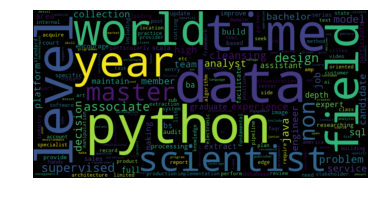

In [18]:
wc_usa = make_wc(usa_dfdic,stopwords)

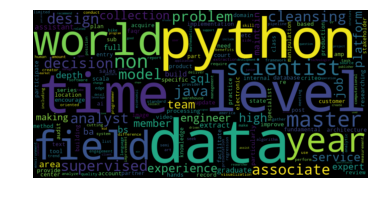

In [23]:
stopwords2=stopwords.copy()
stopwords2.update({"bachelor","ingeniero","bs","student","candidate","industry","experiencia","empresa"})

wc_usa1 = make_wc(usa_dfdic,stopwords2)

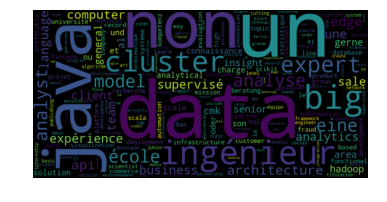

In [21]:
wc_europe = make_wc(europe_dfdic,stopwords)

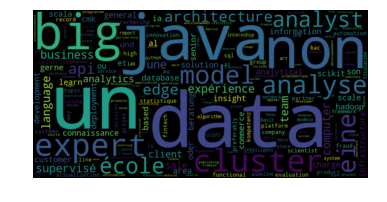

In [24]:
stopwords2=stopwords.copy()
#stopwords2.update({"bachelor’s", "bachelor's", "(bachelors", "bachelors", "bachelor","ingeniero","bs","student","industry","experiencia","empresa"})
stopwords2.update({"bachelor","ingeniero","bs","student","candidate","industry","experiencia","empresa", "eine", "ingénieur", "non", "un", "une"})

#print(stopwords2.intersection({"bachelor","ingeniero"}))
wc_europe1 = make_wc(europe_dfdic,stopwords2)


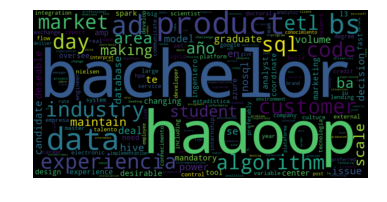

In [25]:
wc_latam = make_wc(latam_dfdic,stopwords)

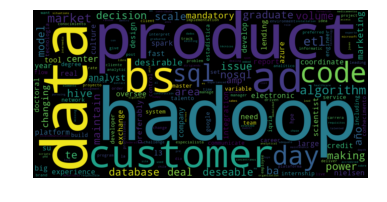

In [27]:
stopwords2=stopwords.copy()
#stopwords2.update({"bachelor’s", "bachelor's", "(bachelors", "bachelors", "bachelor","ingeniero","bs","student","industry","experiencia","empresa"})
stopwords2.update({"bachelor","ingeniero","bs","student","candidate","industry","experiencia","empresa"})

#print(stopwords2.intersection({"bachelor","ingeniero"}))
wc_latam1 = make_wc(latam_dfdic,stopwords2)



In [28]:
for word,value in latam_dfdic.items():
    print(word,value)

Guadalajara Big Data                             company  \
0                            amdocs   
1                            amdocs   
2                            amdocs   
3                            amdocs   
4                            Kueski   
5                    Scalable Press   
6                            Kueski   
7        Hewlett Packard Enterprise   
8                              Uber   
9                          Ericsson   
10                           Kueski   
11                     EPAM Systems   
12                      Micro Focus   
13                           amdocs   
14                           amdocs   
15                           Ooyala   
16       Hewlett Packard Enterprise   
17                      Micro Focus   
18                           Oracle   
19                           amdocs   
20                           Kueski   
21                           amdocs   
22       Hewlett Packard Enterprise   
23                            Ciena   
24  

In [29]:
usa_set = set(wc_usa.words_.keys())
eu_set = set(wc_europe.words_.keys())
latam_set = set(wc_latam.words_.keys())

In [30]:
words_in_all = set.intersection(usa_set,eu_set,latam_set)

In [31]:
def inter_dict(word_set,d1,d2,d3):
    dic = {}
    for word in word_set:
        dic[word] = (d1[word],d2[word],d3[word])
    return dic

In [32]:
word_dic = inter_dict(words_in_all, wc_usa.words_, wc_europe.words_, wc_latam.words_)

In [33]:
df = pd.DataFrame(word_dic,index=['USA','Europe','Latam'])
df = df.T

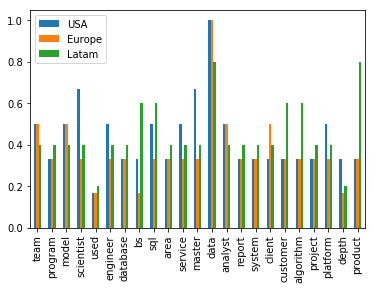

In [34]:
ax = df.plot.bar()

In [35]:
#dictionaries 
usa_frequencyWords = wc_usa.words_
europe_frequencyWords = wc_europe.words_
latam_frequencyWords = wc_latam.words_

In [36]:
def top (dic):
    new_dic = {}
    for k, v in dic.items():
        if(v >= 0.7 and v <= 1) :
            new_dic[k] = v
    
    return new_dic

In [37]:
usa_topWords = top(usa_frequencyWords)
usa_topWords

{'data': 1.0,
 'python': 0.8333333333333334,
 'time': 0.8333333333333334,
 'level': 0.8333333333333334}

In [38]:
europe_topWords = top(europe_frequencyWords)
europe_topWords 

{'data': 1.0, 'un': 1.0}

In [39]:
latam_topWords = top(latam_frequencyWords)
latam_topWords 

{'bachelor': 1.0, 'hadoop': 0.8, 'product': 0.8, 'data': 0.8}

In [41]:
usa_keyWords = list(usa_topWords.keys())
print("USA ",usa_keyWords , len(usa_keyWords))
europe_keyWords = list(europe_topWords.keys())
print("Europe ", europe_keyWords , len(europe_keyWords))
latam_keyWords = list(latam_topWords.keys())
print("Europe ", latam_keyWords , len(latam_keyWords))


USA  ['data', 'python', 'time', 'level'] 4
Europe  ['data', 'un'] 2
Europe  ['bachelor', 'hadoop', 'product', 'data'] 4


In [42]:
def trendsG (keyWords):
    py_resq = TrendReq()
    py_resq.build_payload(kw_list=keyWords[:5])

    trends = py_resq.interest_by_region('CITY')
    trendy = trends.drop(trends[(trends[keyWords[0]] == 0) & (trends[keyWords[1]] == 0) & (trends[keyWords[2]] == 0)].index)
    trendy.sort_index()
    
    return trendy

In [43]:
usa_cities= list(set((pd.read_csv('data/usa.csv')).iloc[:,0]))
usa_cities

['Seattle',
 'San Francisco',
 'Los Angeles',
 'Dallas',
 'Austin',
 'New York',
 'Houston',
 'Atlanta',
 'Chicago',
 'Boston',
 'Washington']

In [44]:
europe_cities= list(set((pd.read_csv('data/europe.csv')).iloc[:,0]))
europe_cities

['Munich',
 'Glasgow',
 'Milan',
 'Frankfurt',
 'Manchester',
 'Zurich',
 'Marseille',
 'Copenhagen',
 'Cardiff',
 'Oslo',
 'Warsaw',
 'Budapest',
 'Stockholm',
 'Berlin',
 'Vienna',
 'Brussels',
 'Amsterdam',
 'Hamburg',
 'Liverpool',
 'Barcelona',
 'Kiev',
 'Estambul',
 'Rome',
 'London',
 'Lisbon',
 'Dublin',
 'Paris',
 'Madrid',
 'Moscow']

In [45]:
latam_cities= list(set((pd.read_csv('data/latinAmerica.csv')).iloc[:,0]))
latam_cities

['Bogota',
 'Monterrey',
 'Montevideo',
 'Sao Paulo',
 'Rosario',
 'Mexico City',
 'Brasilia',
 'Guadalajara',
 'Quito',
 'Tijuana',
 'Rio de Janeiro',
 'Buenos Aires',
 'Cali',
 'Santiago',
 'Lima',
 'Belo Horizonte',
 'Medellin']

In [47]:
gdp = pd.read_csv('data/cities_gdp.csv')
gdp = gdp.drop(columns=['METRO_ID','Variables','TIME','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'])
gdp = gdp.sort_values(by='Metropolitan areas')
gdp_df = gdp.loc[(gdp['VAR'] == 'GDP') & (gdp['Year'] == 2012)]
gdp_df = gdp_df.reset_index(drop=True)
gdp_df = gdp_df.drop(columns=['VAR','Year'])
gdp_df.columns = ['City','GDP']
gdp_df.head()

,City,GDP
0,Aachen,19496.51
1,Acapulco de Juárez,6125.81
2,Adelaide,47478.78
3,Aguascalientes,15768.23
4,Akron,24969.01


In [49]:
trendyUSA = trendsG(usa_keyWords)

In [ ]:
trendyUSA = trendyUSA.reset_index()
trendyUSA[trendyUSA["geoName"].isin(usa_cities)]

In [ ]:
trendyUSA.columns = ['City','level','python','time','master','world']

In [ ]:
trendsUsa_gdp = pd.merge(trendyUSA,gdp_df,how='inner',on='City')

In [ ]:
trendsUsa_gdp

In [ ]:
import math

In [ ]:
trendsUsa_gdp['GDP'] = trendsUsa_gdp.apply(lambda x : math.log(x['GDP']), axis=1)

In [ ]:
trendsUsa_gdp.corr()

In [ ]:
trendyEurope =trendsG(europe_keyWords)

In [ ]:
trendyEurope = trendyEurope.reset_index()
trendyEurope[trendyEurope["geoName"].isin(europe_cities)]

In [ ]:
trendyEurope.columns = ['City','ingénieur','java','école','language','edge']
trendsEurope_gdp = pd.merge(trendyEurope,gdp_df,how='inner',on='City')
trendsEurope_gdp.corr()

trendyLatam.columns = ['City','bachelor','product','hadoop']
trendsLatam_gdp = pd.merge(trendyLatam,gdp_df,how='inner',on='City')
trendsLatam_gdp.corr()

In [ ]:
trendyLatam = trendsG(latam_keyWords)
trendyLatam

In [ ]:
trendyLatam = trendyLatam.reset_index()
trendyLatam[trendyLatam["geoName"].isin(latam_cities)

In [ ]:
# trendyLatam = trendsG(latam_keyWords)
# trendyLatam

py_resq = TrendReq()
py_resq.build_payload(kw_list=latam_keyWords)

trends = py_resq.interest_by_region('CITY')
trendy = trends.drop(trends[(trends[latam_keyWords[0]] == 0) & (trends[latam_keyWords[1]] == 0) & (trends[latam_keyWords[2]] == 0)].index)
trendy.sort_index()

In [ ]:
europe_cities= pd.read_csv('data/europe.csv')
europe_cities

In [ ]:
europeCities = list(set(europe_cities.iloc[:,0]))


In [ ]:
europeCities